### 구글드라이브 연동

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt
 매수종목2.txt
 adult.data
 auto-mpg.csv
 bmi_500.csv
 citibike.csv
 Covid19GenAgeCaseInf.csv
 Covid19InfState.csv
 Covid19NatInfState.csv
 Covid19SidoInfState.csv
 매수종목.csv
 database
 data_mine.csv
 DataNetflixRevenue2020_V2.csv
 DataNetflixSubscriber2020_V2.csv
 data_population.csv
 data_studentlist_en.csv
 example.docx
 height_weight.txt
 Helloword.xlsx
 HelloWorld.xlsx
 KOBIS__.xlsx
 little-char.png
 NetflixsRevenue2018toQ2_2020.csv
 NetflixSubscribersbyCountryfrom2018toQ2_2020.csv
 netflix_titles.csv
 population_number.csv
 ram_price.csv
 ratings_small.txt
 ratings_test.txt
 ratings_train.txt
 sample1.pdf
 sample2.pdf
 sample_merge.pdf
 sample.xlsx
 score.csv
 stock-data.csv
'stock price.xlsx'
'stock valuation.xlsx'
 test.db.db
 Traffic_Accident_2017.csv
 train.csv
 user_id_mean.csv
 user_id_mean.gsheet
 주가데이터.xlsx
 남북한발전전력량.xlsx


### 머신러닝(Machine Learning) 종류

- 지도학습 (Supervised Learning)
- 비지도학습 (Unsupervised Learning)
- 강화학습 (Reinforcement Learning)


지도학습 (Supervised Learning)

- 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법. 

- 분류(Classification)와 회귀(Regression)로 나뉘어진다.
> (ex. 스팸 메일 분류, 집 가격 예측, 손글씨 숫자 판별, 신용카드 의심거래 감지, 의료영상 이미지기반 종양판단)


비지도학습 (Unsupervised Learning)

- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법.

- 데이터의 숨겨진 특징, 구조, 패턴 파악.

- 데이터를 비슷한 특성끼리 묶는 클러스터링(Clustering)과 차원축소(Dimensionality Reduction)등이 있다.
> (ex. 블로그 글 주제구분, 고객 취향별 그룹화, 웹사이트 비정상 접근 탐지, 이미지 감색 처리, 소비자 그룹 마케팅)

좋은 입력 데이터를 만들어내는 방법 -> 특성추출(특성공학)


강화학습 (Reinforcement Learning)

- 지도학습과 비슷하지만 완전한 답(Label)을 제공하지 않는 특징이 있다.

- 기계는 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습

> (ex. 게임이나 로봇 학습)


머신러닝 vs 딥러닝

|구분| Machine Learning| Deep Learning|
|---|---|---|
|훈련 데이터 크기| 작음| 큼|
|시스템 성능| 저 사양| 고 사양|
|feature 선택| 전문가 (사람) |알고리즘|
|feature 수| 많음 |적음|
|문제 해결 접근법| 문제를 분리 -> 각각 답을 얻음 -> 결과 통합| end-to-end (결과를 바로 얻음)|
|실행 시간| 짧음 |김|
|해석력 |해석 가능| 해석 어려움|

### [scikit-learn](https://scikit-learn.org/stable/index.html)

- 파이썬에 머신러닝 프레임워크 라이브러리

- 회귀, 분류, 군집, 차원축소, 특성공학, 전처리, 교차검증, 파이프라인 등 머신러닝에 필요한 기능 제공

- 학습을 위한 샘플 데이터 제공


#### scikit-learn으로 XOR 연산 학습해보기

XOR연산?

- 두값이 서로 같으면 0, 다르면 1  (배타적 논리 합)

|P(입력)| Q(입력)| R(출력)|
|---|---|---|
| 0| 0| 0|
| 0| 1| 1|
| 1| 0| 1|
| 1| 1| 0|


In [ ]:
from sklearn import svm

# XOR의 계산 결과 데이터
xor_input = [
   # P, Q, Result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 학습을 위해 데이터와 레이블 분리하기 --- (※1)
xor_data = []
xor_label = []
for row in xor_input:
  p = row[0]
  q = row[1]
  r = row[2]
  xor_data.append([p,q])
  xor_label.append(r)

# 데이터 학습시키기 --- (※2)
model = svm.SVC()
model.fit(xor_data,xor_label)

# 데이터 예측하기 --- (※3)
pre = model.predict(xor_data)
print('예측 결과',pre)

# 결과 확인하기 --- (※4)


예측 결과 [0 1 1 0]
1


In [ ]:
# pandas 라이브러리를 사용하여 코드 간략화
import pandas as pd
from sklearn import svm, metrics

# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df[[0,1]]
xor_label = xor_df[[2]]

# 데이터 학습과 예측하기 --- (※2)
model = svm.SVC()
model.fit(xor_data,xor_label)
pre = model.predict(xor_data)
# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label,pre)
print('정답률 : ', ac_score)

정답률 :  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# KNN 분류 모델을 이용
import pandas as pd
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier # <- 모델추가

# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df[[0,1]]
xor_label = xor_df[[2]]

# 데이터 학습과 예측하기 --- (※2)
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xor_data,xor_label)
pre = model.predict(xor_data)
# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label,pre)
print('정답률 : ', ac_score)


정답률 :  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


진행순서

>1. clf = 머신러닝모델 생성  # svm.SVC() or KNeighborsClassifier(n_neighbors=1) 
1. clf.fit(문제 , 답)
1. 예측결과 = clf.predict(값을 얻고 싶은 데이터 )
1. ac_score = metrics.accuracy_score(실제답, 예측결과)

clf (classifier) - scikit-learn 에서 [Estimator](https://en.wikipedia.org/wiki/Estimator) 인스턴스인 분류기를 지칭


[머신러닝 용어집](https://developers.google.com/machine-learning/glossary)

#### 모델 저장과 불러오기 - pickle

In [ ]:
import pickle

with open('xor_model,pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle

with open('xor_model,pkl','rb') as f:
  model2 = pickle.load(f)

# 문제
x_test = [
    [1, 1]
]

# 모델 예측
pre = model2.predict(x_test)
pre[0]

0

#### 모델 저장과 불러오기 - joblib

In [ ]:
from sklearn.externals import joblib

joblib.dump(model, 'xor_model_2.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['xor_model_2.pkl']

In [ ]:
from sklearn.externals import joblib

model3 = joblib.load('xor_model_2.pkl')

# 문제
x_test = [
    [1, 1]
]

# 모델 예측
pre = model3.predict(x_test)
pre[0]

0

#### scikit-learn 연습 01

AND 연산 모델 작성

AND연산?

- 두값이 서로 참이면 1, 아니면 0 

|P(입력)| Q(입력)| R(출력)|
|---|---|---|
| 0| 0| 0|
| 0| 1| 0|
| 1| 0| 0|
| 1| 1| 1|

In [ ]:
# KNN 분류 모델을 이용
import pandas as pd
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier

# AND 연산
and_input = [
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
]

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xand_df = pd.DataFrame(and_input)
xand_data = xand_df[[0,1]]
xand_label = xand_df[[2]]

# 데이터 학습과 예측하기 --- (※2)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(xand_data,xand_label)
pre = model.predict(xand_data)
# 정답률 구하기 --- (※3)
print('정답률: ', metrics.accuracy_score(xand_label,pre))

정답률:  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


#### 분류? 회귀?

- 같은 종류의 꽃(붓꽃)을 세 품종 중 하나로 예측하는 것
- 이메일에서 스팸 메일을 예측하는 것
- 웹사이트의 글로부터 어떤 언어의 웹사이트인지 예측하는 것
- 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것
- 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 것
- 다음 학기 성적 점수를 예측하는 것
- 키와 몸무게를 가지고 비만도를 예측하는 것

#### scikit-learn 연습 02

비만도 데이터 학습

- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈

data = pd.read_csv(drive_path + 'bmi_500.csv', index_col='Label')
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [ ]:
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [ ]:

data.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


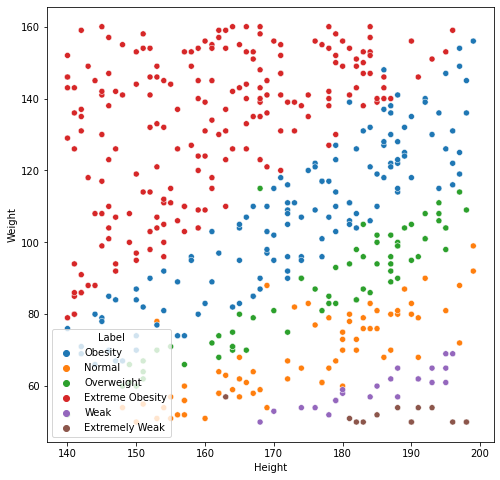

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x='Height', y='Weight', hue = 'Label',data = data)

모델링

1. 문제와 답으로 분리

2. 훈련셋과 평가셋으로 분리

3. 모델생성 및 하이퍼파라미터 조정

4. 학습 및 평가

In [ ]:
data = pd.read_csv(drive_path + 'bmi_500.csv')

x = data.loc[:,'Height':'Weight']
y = data.loc[:,'Label']

x_train = x.iloc[:350,:]
x_test = x.iloc[350:,:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

model = KNeighborsClassifier(n_neighbors = 10)
model.fit(x_train,y_train)
pre = model.predict(x_test)
metrics.accuracy_score(pre,y_test)

0.9333333333333333

In [ ]:
# 예측 활용
model.predict([[100,20],[185,43]])

In [ ]:
# Hyper Parameter 조정
index = []
score = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  index.append(i)
  score.append( knn.score(x_test, y_test) )
  print('K가', i, '일때 정확도: {:.2f}'.format(score[i-1]))

plt.plot(index, score)

### 머신러닝(Machine Learning) 진행 과정

1. ProblemIdentification (문제정의)
2. Data Collect(데이터 수집)
3. Data Preprocessing(데이터 전처리)
4. EDA(탐색적 데이터분석)
5. Model 선택, Hyper Parameter 조정
6. 학습
7. 모델 Evaluation(평가)


1. 문제정의
 - 지도학습 : 분류, 회귀
 - 비지도학습 : 군집, 차원축소
 - 강화학습

2. 데이터 수집
 - File Data, Database, 공공데이터, kaggle
 - Web Crawler (뉴스, SNS, 블로그)
 - IoT 센서를 통한 수집

3. 데이터 전처리
 - 결측치, 이상치 수정
 - Encoding : Categorical Data를 수치 데이터로 변경, 원핫인코딩
 - Feature Engineering (특성공학) : 단위 변환, 새로운 속성 추가 (MinMaxScaler, StandardScaler, RobustScaler)

4. EDA
 - 시각화를 통해 특성 선택 : (scatterplot, pairplot, boxplot, heatmap)
 - 사용할 Feature 선택 : 전처리 전략수립

5. Model 선택, Hyper Parameter 조정
 - 목적에 맞는 적절한 모델 선택
  - 지도학습
	 - 분류 : knn, Logistic Regression, SVM, Decision Tree, RandomForest, GradientBoosting
	 - 회귀 : knn, Linear Regression, Lasso, Ridge, Decision Tree, RandomForest, GradientBoosting
 - 하이퍼파라미터 튜닝

6. 학습
 - model.fit(X_train, y_train) : train 데이터와 test 데이터를 7:3 정도로 나눔 (train_test_split)
 - model.predict(X_test) :  (cross_val_score)

7. 평가
 -	지도학습
	 - 분류 : 정확도, 정밀도, 재현율, f1-score
	 - 회귀 : R^2, MSE, RMSE

 -	비지도학습
	- ARI 값